Because we want to predict, records in PdM_maint that are Proactive maintenance will not be necessary. Only Reactive Maintenance. And $\text{PdM_failures} \subseteq \text{PdM_maint}$ and $\forall \text{reactive Maintenance}; \text{reactive Maintenance} \in \text{PdM_failures}$

## Importing libraries

In [16]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.26.4
pandas version: 2.1.4
scikit-learn version: 1.2.2
matplotlib version: 3.8.0


## Loading the data source

In [17]:
df_machines = pd.read_csv('data/PdM_machines.csv')
df_errors = pd.read_csv('data/PdM_errors.csv')
df_failures = pd.read_csv('data/PdM_failures.csv')
df_telemetry = pd.read_csv('data/PdM_telemetry.csv')

## Explore dataset

In [18]:
df_machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [19]:
df_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [20]:
df_failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [21]:
df_telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


## Cleaning dataset

In [22]:
df_machines.model = df_machines.model.astype('category')

df_machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   machineID  100 non-null    int64   
 1   model      100 non-null    category
 2   age        100 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.0 KB


In [23]:
df_errors.datetime = df_errors.datetime.astype(dtype='datetime64[s]')

df_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   datetime   3919 non-null   datetime64[s]
 1   machineID  3919 non-null   int64        
 2   errorID    3919 non-null   object       
dtypes: datetime64[s](1), int64(1), object(1)
memory usage: 92.0+ KB


In [24]:
df_failures.datetime = df_failures.datetime.astype(dtype='datetime64[s]')

df_failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   datetime   761 non-null    datetime64[s]
 1   machineID  761 non-null    int64        
 2   failure    761 non-null    object       
dtypes: datetime64[s](1), int64(1), object(1)
memory usage: 18.0+ KB


In [26]:
df_telemetry.datetime = df_telemetry.datetime.astype(dtype='datetime64[s]')

df_telemetry.info()
df_telemetry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype        
---  ------     --------------   -----        
 0   datetime   876100 non-null  datetime64[s]
 1   machineID  876100 non-null  int64        
 2   volt       876100 non-null  float64      
 3   rotate     876100 non-null  float64      
 4   pressure   876100 non-null  float64      
 5   vibration  876100 non-null  float64      
dtypes: datetime64[s](1), float64(4), int64(1)
memory usage: 40.1 MB


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


## Data exploration

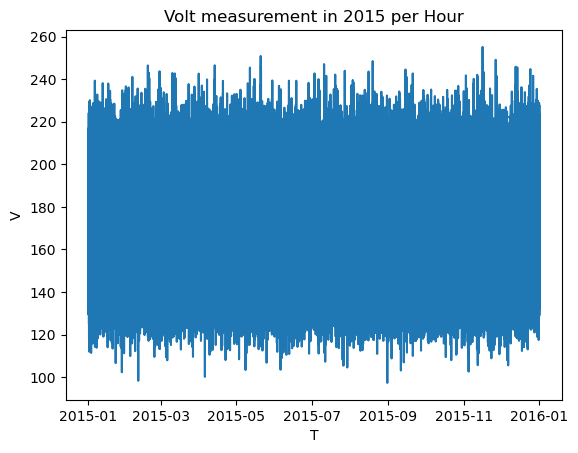

In [30]:
df_volt = df_telemetry[['datetime', 'volt']]

plt.figure()
plt.plot(df_volt.datetime, df_volt.volt)

plt.xlabel("T")
plt.ylabel("V")
plt.title("Volt measurement in 2015 per Hour")

plt.show()

In [ ]:
# Iterate over unique models
for model in df_machines['model'].unique():
    # Filter data for the current model
    model_data = df_machines[df_machines['model'] == model]
    # Plot boxplot for the current model
    plt.boxplot(model_data['age'], positions=[list(df_machines['model'].unique()).index(model)], labels=[model])

plt.xlabel('Model')
plt.ylabel('Age')
plt.title('Boxplot of Age for Different Models')
plt.grid(True)
plt.show()

In [ ]:
# Extract quarter from datetime
df_errors['quarter'] = df_errors['datetime'].dt.to_period('W')

# Group by quarter and count errors
error_counts = df_errors.groupby('quarter')['errorID'].count()

# Extract quarter from datetime
df_failures['quarter'] = df_failures['datetime'].dt.to_period('W')

# Group by quarter and count errors
failure_counts = df_failures.groupby('quarter')['failure'].count()

# Plotting
plt.figure(figsize=(10, 6))
error_counts.plot(kind='line', color='yellow')
failure_counts.plot(kind='line', color='red')
plt.xlabel('Quarter')
plt.ylabel('Total Error Count')
plt.title('Total Error Count per Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Extract quarter from datetime
df_failures['quarter'] = df_failures['datetime'].dt.to_period('Q')

# Group by quarter and count errors
failure_counts = df_failures.groupby('quarter')['failure'].count()

# Plotting
plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar', color='red')
plt.xlabel('Quarter')
plt.ylabel('Total Error Count')
plt.title('Total Error Count per Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()